# The irreducible mass of black holes

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astroML import stats as astroMLstats
from sklearn.neighbors import KernelDensity

import scipy.stats as stats
import scipy.stats
from scipy.stats import norm

from tqdm.notebook import tqdm

For a BH of mass $M$ spin $\chi\in [0,1]$, the irreducible mass is 
\begin{equation}
M_{\rm irr} = %\sqrt{\frac{M^2+\sqrt{M^4-S^2}}{2}} = 
 M \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}}
\label{mirrdef}
\end{equation}

In [2]:
def littlef(spin):
    return ((1+(1-chi**2)**0.5)/2)**0.5

For convenience, let us define 

$$f(\chi) = \sqrt{\frac{1+\sqrt{1-\chi^2}}{2}} = \frac{M_{\rm irr}}{M}$$

In [3]:
def kde_sklearn(data, bandwidth = 1.0, kernel="linear"):
    kde_skl = KernelDensity(bandwidth = bandwidth, kernel=kernel)
    kde_skl.fit(data[:, np.newaxis])
    log_pdf = kde_skl.score_samples(xgrid[:, np.newaxis]) # sklearn returns log(density)

    return np.exp(log_pdf)

In [4]:
N = 1000
sigma = 0.02


**a)**

The pdf of f is define as:
\begin{equation}
f\_pdf = \pi(f) = 2\frac{2 f^2-1}{\sqrt{1 - f^2}}\,.
\end{equation}

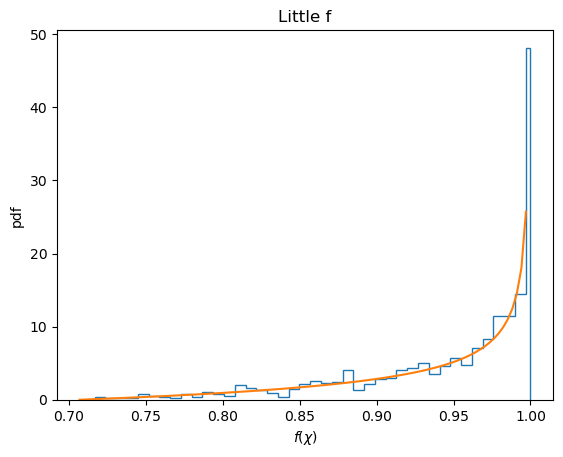

In [5]:
chi = np.random.uniform(0,1,N)[:-1]

Scott_step = (3.5*sigma)/(N**(1/3))
Scott_bins = np.append(np.arange(start = littlef(chi).min(),stop = littlef(chi).max(), step = Scott_step),littlef(chi).max()) 


f = littlef(chi)
plt.hist(f,density=True,bins = Scott_bins, histtype='step');

f = np.linspace(1/2**0.5,1,100)[:-1]
pdff = 2*(2*f**2-1)/(1 - f**2)**0.5
plt.plot(f,pdff);

plt.xlabel("$f(\chi)$")
plt.ylabel("pdf")
plt.title("Little f")
plt.show()

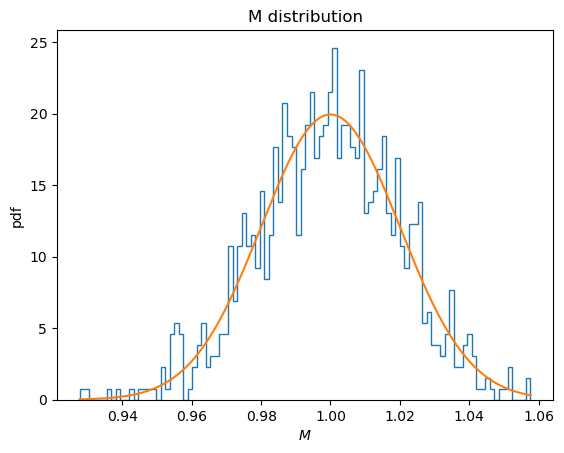

In [6]:
#Histogram
M = np.random.normal(loc=1,scale=sigma,size=N)

plt.hist(M, bins = 100, density = True,histtype='step');
plt.xlabel("$M$")
plt.ylabel("pdf")

#Plot
xgrid = np.linspace(M.min(),M.max(),1000)
M = norm.pdf(xgrid, 1, sigma)

plt.plot(xgrid,M)

plt.title("M distribution")
plt.show()

Try an histogram of M_irr and plot the resulting pdf of M_irr. Here, we are going to use the  *Scott's rule*

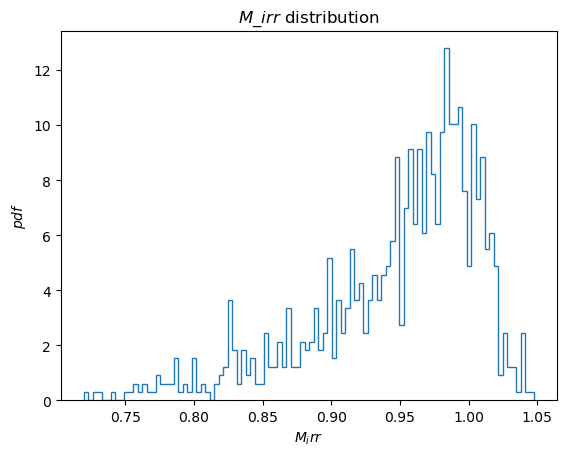

In [7]:
chi = np.random.uniform(0,1, N)

f = littlef(chi)
M = np.random.normal(loc=1,scale=sigma,size=N)
Mirr=M*f
plt.hist(M*f,bins=100,histtype='step',density=True);
plt.xlabel("$M_irr$")
plt.ylabel("$pdf$")

plt.title("$M\_irr$ distribution")
plt.show()

**b)**

1. Compute the KS distance between ${M_{\rm irr}}$ and ${f}$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$. 

2. Compute the KS distance between ${M_{\rm irr}}$ and $M$ as a function of $\sigma$. Discuss the limits at large and small values of $\sigma$.

  0%|          | 0/30 [00:00<?, ?it/s]

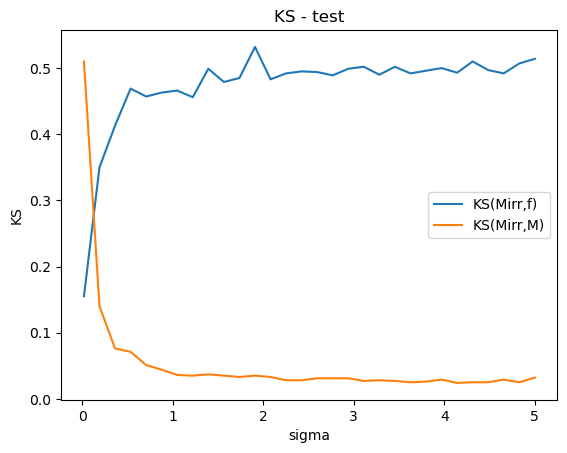

In [8]:
chi = np.random.uniform(0,1,N)
f = littlef(chi)

x = np.linspace(0.02,5,1000)

KS_f= []
KS_M =[]

sigma =np.linspace(0.02,5,30)
#sigma = np.logspace(-3,3,30)

for si in tqdm(sigma):
    M = np.random.normal(loc=1,scale=si,size=N)
   
    KS_f.append(stats.ks_2samp(M*f,f))
    KS_M.append(stats.ks_2samp(M*f,M))
    

KS_f = np.array(KS_f)
KS_M = np.array(KS_M)

plt.plot(sigma,KS_f[:,0],label='KS(Mirr,f)')
plt.plot(sigma,KS_M[:,0],label='KS(Mirr,M)')
#plt.semilogx()
plt.xlabel("sigma")
plt.ylabel("KS")
plt.title("KS - test")

plt.legend()
plt.show()

From the graph above, you should say that 
- $M_{\rm irr}$ is distributed like $f$ if ${\sigma}\ll \mu$ (small value of sigma)
- $M_{\rm irr}$ is distributed like $M$ if  $\sigma\gg \mu$. (high value of sigma)

**c)**

Compute the pdfs of $M_{\rm irr}$ from their mathematical definitions, plot them, and check they agree with your KDE.

In [9]:
chi = np.random.uniform(0,1, N)
f = littlef(chi)
M = np.random.normal(loc=1,scale=0.02,size=N)
Mirr=M*f
sigma =0.02

- Let's compute the pdf of $M\_irr$

Text(0.5, 1.0, 'pdf of $M\\_irr$')

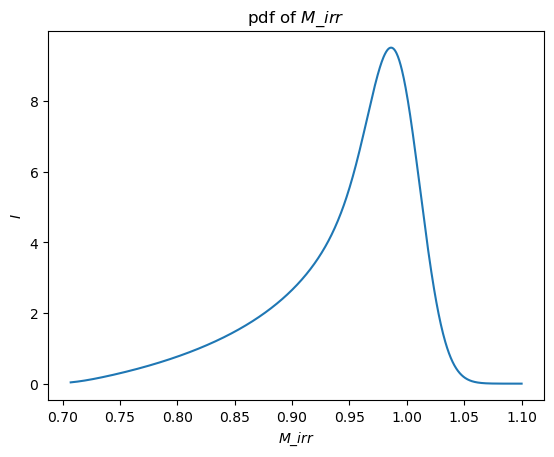

In [10]:
def integrand(f,x):
    mean=1
    const = np.sqrt(2/np.pi)/sigma
    
    return const * np.exp(-(x/f -1)**2 /(2*sigma**2))* (2*(f**2) - 1)/(np.sqrt(1 - f**2))

a=1/np.sqrt(2)
b = 1
x= np.linspace(min(1-5*sigma,1/np.sqrt(2)),1+5*sigma,N)

I = [scipy.integrate.quad(lambda f: integrand(f,xt),a,b)[0] for xt in x]


plt.plot(x,I)
plt.xlabel("$M\_irr$")
plt.ylabel("$I$")
plt.title("pdf of $M\_irr$")

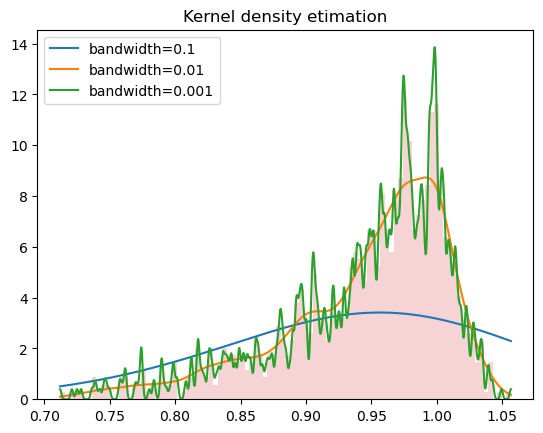

In [11]:
chi = np.random.uniform(0,1, N)
f = littlef(chi)
M = np.random.normal(loc=1,scale=0.02,size=N)
Mirr=M*f



xgrid = np.linspace(Mirr.min(),Mirr.max(),N)

bandwidth = [0.1,0.01,0.001]
for bandwidth in bandwidth:
    pdf_Mirr = kde_sklearn(Mirr,bandwidth=bandwidth,kernel="gaussian")
    plt.plot(xgrid,pdf_Mirr,label='bandwidth='+str(bandwidth))
    plt.legend()

plt.hist(M*f,bins=100,density=True,alpha = 0.2);
plt.title("Kernel density etimation")
plt.show()

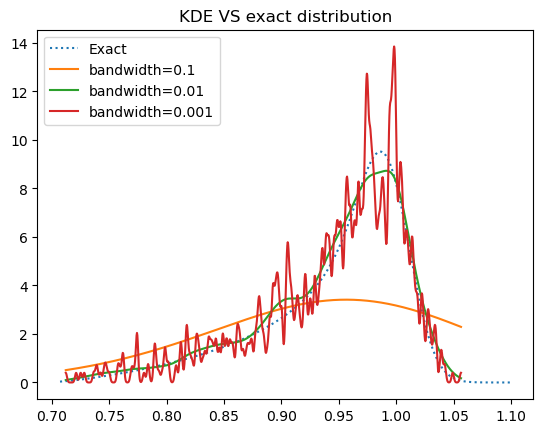

In [12]:
plt.plot(x,I,label="Exact",ls ='dotted')

bandwidth = [0.1,0.01,0.001]


for bandwidth in bandwidth:
    pdf_Mirr = kde_sklearn(Mirr,bandwidth=bandwidth,kernel="gaussian")
    plt.plot(xgrid,pdf_Mirr,label='bandwidth='+str(bandwidth))

plt.title("KDE VS exact distribution")
plt.legend()
